In [2]:
# Load Libraries & Data
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [3]:
X_train = np.load("../data/processed/X_train.npy")
X_test  = np.load("../data/processed/X_test.npy")
y_train = np.load("../data/processed/y_train.npy")
y_test  = np.load("../data/processed/y_test.npy")


In [4]:
# Handle Class Imbalance
fraud_ratio = (y_train == 0).sum() / (y_train == 1).sum()
fraud_ratio


np.float64(577.2868020304569)

In [6]:
# Train XGBoost Model
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=fraud_ratio,
    objective="binary:logistic",
    eval_metric="auc",
    random_state=42,
    n_jobs=-1
)

xgb_model.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [7]:
# Predictions & Evaluation
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]


In [8]:
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.86      0.84      0.85        98

    accuracy                           1.00     56962
   macro avg       0.93      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [9]:
roc_auc_xgb = roc_auc_score(y_test, y_proba_xgb)
roc_auc_xgb


0.9801210263227407

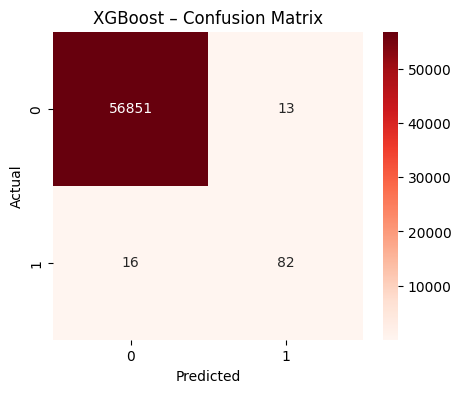

In [10]:
# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost – Confusion Matrix")

plt.savefig("../results/xgboost_confusion_matrix.png", bbox_inches="tight")
plt.show()


## XGBoost Model Interpretation (NIW Perspective)

The XGBoost model demonstrates strong fraud detection performance by leveraging ensemble 
boosting techniques designed for highly imbalanced data.

Such models are widely adopted in U.S. financial institutions due to their ability to 
identify complex fraud patterns while maintaining operational efficiency. Improved fraud 
detection directly contributes to economic protection and financial system resilience.
